In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
######################################################
# import the dataset
######################################################
# set up file reading parameters
Pdataset='breast-cancer-data-original.txt'

Pnames=['class','age','menopausal','tumorSize','nodes','nodeCaps','malignancy' #column names
       ,'leftRight','quadrant','irradiated']

BC_orig = pd.read_csv(Pdataset,names=Pnames)

print('Breast-cancer: total rows raw data: ',BC_orig.shape[0]) # number of data rows  
BC_orig.head()

Breast-cancer: total rows raw data:  286


,class,age,menopausal,tumorSize,nodes,nodeCaps,malignancy,leftRight,quadrant,irradiated
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [20]:
# convert ranges to strings
BC_coded = BC_orig.replace('-', '_', regex=True)
BC_coded.head()

,class,age,menopausal,tumorSize,nodes,nodeCaps,malignancy,leftRight,quadrant,irradiated
0,no_recurrence_events,30_39,premeno,30_34,0_2,no,3,left,left_low,no
1,no_recurrence_events,40_49,premeno,20_24,0_2,no,2,right,right_up,no
2,no_recurrence_events,40_49,premeno,20_24,0_2,no,2,left,left_low,no
3,no_recurrence_events,60_69,ge40,15_19,0_2,no,2,right,left_up,no
4,no_recurrence_events,40_49,premeno,0_4,0_2,no,2,right,right_low,no


In [21]:
# code all data as numeric values, in order of ascending value where possible
# code few unknown values as the most common value

class_dict = {"no-recurrence-events": "0", "recurrence-events": "1"}
age_dict = {"20-29": "1", "30-39": "2", "40-49": "3", "50-59": "4", "60-69": "5", "70-79": "6"}
menopausal_dict = {"premeno": "0", "lt40": "1", "ge40": "2"}
tumorSize_dict = {"0-4": "0", "5-9": "1", "10-14": "2", "15-19": "3", "20-24": "4", "25-29": "5", "30-34": "6", "35-39": "7", "40-44": "8", "45-49": "9", "45-49": "9", "50-54": "10"}
nodes_dict = {"0-2": "0", "3-5": "1", "6-8": "2", "9-11": "3" ,"12-14": "4", "15-17": "5", "24-26": "6"}
nodeCaps_dict = {"no": "0", "yes": "1", "?": "0"}
leftRight_dict = {"left": "0", "right": "1"}
quadrant_dict = {"left_low": "1", "left_up": "2", "right_low": "3", "right_up": "4", "central": "0", "?": "1"}
irradiated_dict = {"no": "0", "yes": "1"}


BC_coded_num = BC_orig.replace({"class": class_dict})
BC_coded_num = BC_coded_num.replace({"age": age_dict})
BC_coded_num = BC_coded_num.replace({"menopausal": menopausal_dict})
BC_coded_num = BC_coded_num.replace({"tumorSize": tumorSize_dict})
BC_coded_num = BC_coded_num.replace({"nodes": nodes_dict})
BC_coded_num = BC_coded_num.replace({"nodeCaps": nodeCaps_dict})
BC_coded_num = BC_coded_num.replace({"leftRight": leftRight_dict})
BC_coded_num = BC_coded_num.replace({"quadrant": quadrant_dict})
BC_coded_num = BC_coded_num.replace({"irradiated": irradiated_dict})

BC_coded_num['class'].unique()
BC_coded_num['age'].unique()
BC_coded_num['menopausal'].unique()
BC_coded_num['tumorSize'].unique()
BC_coded_num['nodes'].unique()
BC_coded_num['nodeCaps'].unique()
BC_coded_num['leftRight'].unique()
BC_coded_num['quadrant'].unique()
BC_coded_num['irradiated'].unique()

BC_coded_num.head()


,class,age,menopausal,tumorSize,nodes,nodeCaps,malignancy,leftRight,quadrant,irradiated
0,0,2,0,6,0,0,3,0,1,0
1,0,3,0,4,0,0,2,1,4,0
2,0,3,0,4,0,0,2,0,1,0
3,0,5,2,3,0,0,2,1,2,0
4,0,3,0,0,0,0,2,1,3,0


In [22]:
# convert the datatypes of the new coded values to integer
#print(BC_coded_num.dtypes)

for i in range(len(BC_coded_num.columns)): 
    #feature=BC_coded_num.columns[i]
    #BC_coded_num.columns[i]=BC_coded_num.columns[i].astype(str).astype(int)
    BC_coded_num[BC_coded_num.columns[i]]= pd.to_numeric(BC_coded_num[BC_coded_num.columns[i]]).astype(int)
print(BC_coded_num.dtypes)    

class         int32
age           int32
menopausal    int32
tumorSize     int32
nodes         int32
nodeCaps      int32
malignancy    int32
leftRight     int32
quadrant      int32
irradiated    int32
dtype: object


In [23]:
# write the new files out to a file to be used in MATLAB
BC_coded_num.to_csv('breast-cancer-coded.csv',index=False)

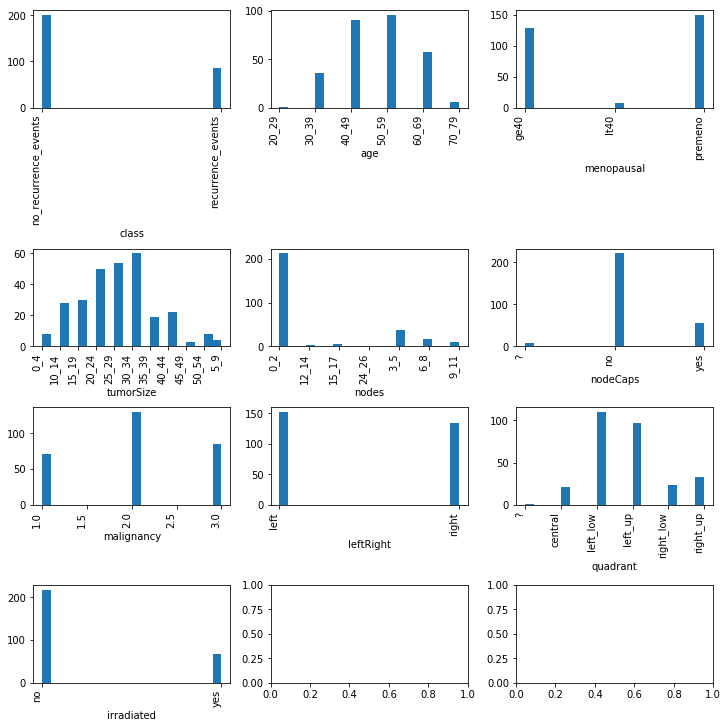

In [24]:
df=BC_coded

rows=4;cols=3   
fig,axes = plt.subplots(rows,cols,figsize=(10,10),constrained_layout=True) #

row=0;col=0
for i in range(len(df.columns)): 
    feature=df.columns[i]
    axes[row,col].hist(np.sort(df[feature]), bins=20)
    axes[row,col].set_xlabel(BC_coded.columns[i])
    for label in axes[row,col].get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
    col=col+1
    if col >= cols:
        col=0
        row=row+1 
        if row >= rows:
            exit

### Check correlations in the data

1.  the only strong correlations with the Classifier are malignancy, nodes, irradiated, tumor size
2.  there is strong correlation between age/menopausal status and node/nodeCaps so we can try modelling the data with only one of each pair.

In [25]:
df=BC_coded_num
ColumnList = df.columns

correlation = df[ColumnList].corr(method='pearson') # calculate the correlation between column values
corr_matrix = pd.melt(correlation.reset_index(),id_vars=['index'])
corr_matrix.tail(10)
#correlation.head(10)

corr_reduce = corr_matrix.drop(corr_matrix[corr_matrix['index']==corr_matrix['variable']].index)
class_corr = corr_reduce.drop(corr_reduce[corr_reduce['index']!='class'].index) # remove all but class corrs
corr_pairwise = corr_reduce.drop(corr_reduce[corr_reduce['index']=='class'].index) # remove class corrs
corr_pairwise = corr_pairwise.drop(corr_pairwise[corr_pairwise['variable']=='class'].index) # remove class corrs

corr_pairwise['abs_corr']=abs(corr_pairwise['value'])
class_corr['abs_corr']=abs(class_corr['value'])

corr_pairwise.sort_values(by ='abs_corr',ascending=False).head(30) # show pairwise correlations ordered by Pearson value
class_corr.sort_values(by = 'abs_corr',ascending=False).head(10) # show classifier correlations

,index,variable,value,abs_corr
60,class,malignancy,0.299400,0.299400
50,class,nodeCaps,0.276792,0.276792
40,class,nodes,0.276171,0.276171
90,class,irradiated,0.193912,0.193912
30,class,tumorSize,0.175065,0.175065
10,class,age,-0.071719,0.071719
70,class,leftRight,-0.058646,0.058646
20,class,menopausal,-0.052498,0.052498
80,class,quadrant,0.047380,0.047380


Scatter plots of each feature against the classifier.  
However the nature of the data means that these results are not particularly useful

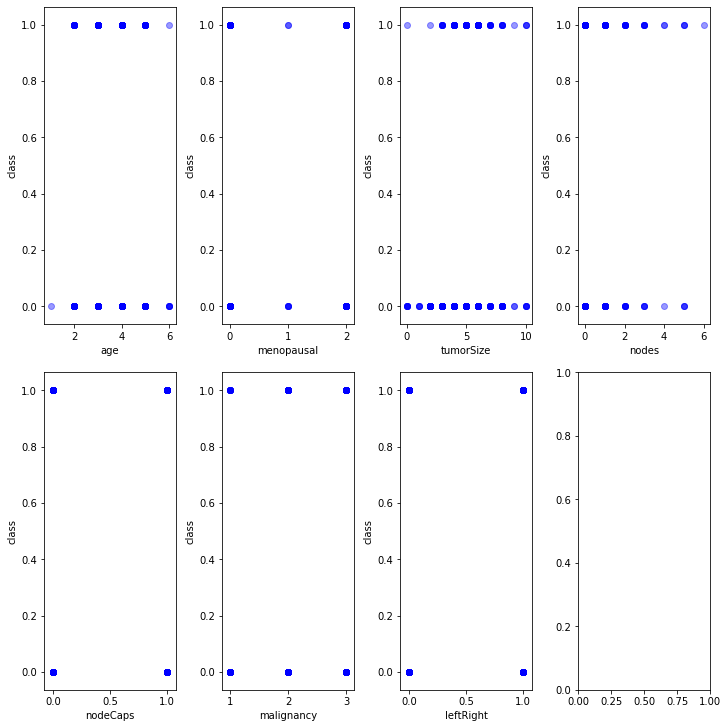

In [26]:
def MultiScatter(array,main,columns,cols,rows):
    fig,axes = plt.subplots(rows,cols,figsize=(10,10),constrained_layout=True) #,constrained_layout=True# figsize=(10, 10)create Figure fig with subplots axes[0,0] to [1,2]

    row=0;col=0
    for i in range(columns): #len(student.columns)
        if temp.columns[i] != main:
            axes[row,col].set(xlabel=temp.columns[i],ylabel=main)
            axes[row,col].scatter(temp[temp.columns[i]],temp[main],alpha=0.4,c='blue')
            col=col+1
        if col >= cols:
            col=0
            row=row+1 
            if row >= rows:
                exit
    plt.show()
    
temp=BC_coded_num
MultiScatter(temp,'class',8,4,2)